# 2020 Rolex 24 Hours of Daytona

Leader board at [IMSA Scoring](https://scoring.imsa.com/)
 
Data from [IMSA Results](http://results.imsa.com/). "Results by hour" csv only lists laps and time at the end of the hour, but is posted more quickly than the more granular timecards files.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.dates import date2num, datestr2num, num2date
mpl.rcParams['font.sans-serif'] = "AppleGothic"
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [26]:
h1 = pd.read_csv("./data/h1.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h2 = pd.read_csv("./data/h2.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h3 = pd.read_csv("./data/h3.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h4 = pd.read_csv("./data/h4.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h5 = pd.read_csv("./data/h5.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h6 = pd.read_csv("./data/h6.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h7 = pd.read_csv("./data/h7.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)
h8 = pd.read_csv("./data/h8.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False)

In [27]:
data = pd.concat([h1,h2,h3,h4,h5,h6,h7,h8]).fillna(0)
data.head()

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,DRIVER_4,VEHICLE,TYRES,CLASS,GROUP,DIVISION,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH,DRIVER_5,Unnamed: 21
0,1,77,Mazda Team Joest,Oliver Jarvis,Tristan Nunez,Olivier Pla,0,Mazda DPi,M,DPi,0.0,0.0,Classified,37,1:01'03.633,0,0,36,1'35.652,215.6,0.0,0.0
1,2,31,Whelen Engineering Racing,Felipe Nasr,Mike Conway,Pipo Derani,Filipe Albuquerque,Cadillac DPi,M,DPi,0.0,0.0,Classified,37,1:01'06.026,2.393,2.393,12,1'36.037,214.8,0.0,0.0
2,3,6,ACURA TEAM PENSKE,Dane Cameron,Juan Pablo Montoya,Simon Pagenaud,0,Acura DPi,M,DPi,0.0,0.0,Classified,37,1:01'08.888,5.255,2.862,22,1'35.741,215.4,0.0,0.0
3,4,55,Mazda Team Joest,Jonathan Bomarito,Harry Tincknell,Ryan Hunter-Reay,0,Mazda DPi,M,DPi,0.0,0.0,Classified,37,1:01'12.594,8.961,3.706,33,1'36.046,214.7,0.0,0.0
4,5,7,ACURA TEAM PENSKE,Helio Castroneves,Alexander Rossi,Ricky Taylor,0,Acura DPi,M,DPi,0.0,0.0,Classified,37,1:01'23.202,19.569,10.608,23,1'36.379,214.0,0.0,0.0


In [28]:
timeformat = '%H:%M\'%S.%f'
data['time'] = pd.to_datetime(data.loc[:,'TOTAL_TIME'], format=timeformat)
data.head()

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,DRIVER_4,VEHICLE,TYRES,CLASS,GROUP,DIVISION,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH,DRIVER_5,Unnamed: 21,time
0,1,77,Mazda Team Joest,Oliver Jarvis,Tristan Nunez,Olivier Pla,0,Mazda DPi,M,DPi,0.0,0.0,Classified,37,1:01'03.633,0,0,36,1'35.652,215.6,0.0,0.0,1900-01-01 01:01:03.633
1,2,31,Whelen Engineering Racing,Felipe Nasr,Mike Conway,Pipo Derani,Filipe Albuquerque,Cadillac DPi,M,DPi,0.0,0.0,Classified,37,1:01'06.026,2.393,2.393,12,1'36.037,214.8,0.0,0.0,1900-01-01 01:01:06.026
2,3,6,ACURA TEAM PENSKE,Dane Cameron,Juan Pablo Montoya,Simon Pagenaud,0,Acura DPi,M,DPi,0.0,0.0,Classified,37,1:01'08.888,5.255,2.862,22,1'35.741,215.4,0.0,0.0,1900-01-01 01:01:08.888
3,4,55,Mazda Team Joest,Jonathan Bomarito,Harry Tincknell,Ryan Hunter-Reay,0,Mazda DPi,M,DPi,0.0,0.0,Classified,37,1:01'12.594,8.961,3.706,33,1'36.046,214.7,0.0,0.0,1900-01-01 01:01:12.594
4,5,7,ACURA TEAM PENSKE,Helio Castroneves,Alexander Rossi,Ricky Taylor,0,Acura DPi,M,DPi,0.0,0.0,Classified,37,1:01'23.202,19.569,10.608,23,1'36.379,214.0,0.0,0.0,1900-01-01 01:01:23.202


(250, 260)

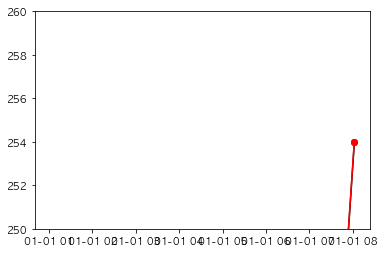

In [31]:
plotdata = data.loc[data['NUMBER'] == 19]
plotdata2 = data.loc[data['NUMBER'] == 5]
plt.plot(plotdata['time'],plotdata['LAPS'],'-ok')
plt.plot(plotdata2['time'],plotdata['LAPS'],'-or')